In [1]:
pl = pd.read_csv('GMagAO-X-target-list.csv')

## Select important subset of columns:

In [2]:
orbits = pl[['pl_name','pl_orbsmax','pl_orbper','pl_orbincl','pl_orbeccen','pl_bmasse','pl_bmassj','st_mass', 
             'sy_dist','PlanetRadiuse', 'pl_orblper','StarTeff', 'st_logg', 'st_met', 'StarRad','sy_imag',
            'sy_gaiamag','rastr','ra','decstr','dec','SpT Number']]
orbits

,pl_name,pl_orbsmax,pl_orbper,pl_orbincl,pl_orbeccen,pl_bmasse,pl_bmassj,st_mass,sy_dist,PlanetRadiuse,...,st_logg,st_met,StarRad,sy_imag,sy_gaiamag,rastr,ra,decstr,dec,SpT Number
0,Proxima Cen b,0.04856,11.18680,NaN,0.020,1.07000,0.00337,0.12,1.30119,1.03,...,5.16,NaN,0.14,NaN,8.95361,14h29m34.43s,217.393466,-62d40m34.26s,-62.676182,6.55
1,eps Eri b,3.53000,2671.00000,78.81,0.070,209.76675,0.66000,0.82,3.20260,14.10,...,4.59,-0.130,0.76,NaN,3.47719,03h32m54.82s,53.228431,-09d27m29.42s,-9.458172,5.20
2,GJ 887 c,0.12000,21.78900,NaN,NaN,7.60000,0.02391,0.49,3.29000,2.67,...,4.78,-0.060,0.47,NaN,6.52199,23h05m52.04s,346.466827,-35d51m11.0s,-35.853069,6.10
3,GJ 887 b,0.06800,9.26200,NaN,0.000,4.20000,0.01321,0.49,3.29000,1.88,...,4.78,-0.060,0.47,NaN,6.52199,23h05m52.04s,346.466827,-35d51m11.0s,-35.853069,6.10
4,Ross 128 b,0.04960,9.86580,NaN,0.116,1.40000,0.00440,0.17,3.37454,1.11,...,5.05,-0.020,0.20,NaN,9.59067,11h47m45.02s,176.937604,+00d47m57.44s,0.799290,6.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,HD 66141 b,1.20000,480.50000,NaN,0.070,1906.90000,6.00000,1.10,68.15090,12.80,...,1.78,-0.323,21.40,NaN,3.97926,08h02m15.91s,120.566282,+02d20m06.10s,2.335027,5.20
741,HD 143361 b,1.98800,1039.15000,55.00,0.197,1382.55357,4.35000,0.97,68.51460,12.90,...,4.47,0.140,0.92,NaN,9.01602,16h01m50.12s,240.458841,-44d26m06.21s,-44.435057,4.60
742,HD 179079 b,0.12140,14.47900,NaN,0.049,25.74423,0.08100,1.14,69.71160,5.48,...,4.16,0.240,1.63,NaN,7.77454,19h11m09.69s,287.790373,-02d38m19.57s,-2.638770,4.50
743,HD 72892 b,0.22800,39.44603,NaN,0.419,1737.88573,5.46800,1.01,69.73110,12.80,...,4.27,0.250,1.22,NaN,8.64690,08h34m52.69s,128.719555,-14d27m26.75s,-14.457431,4.50


### Drop planets lacking necessary entries:

In [3]:
print('Missing sma:',np.where(np.isnan(orbits['pl_orbsmax']))[0])
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbsmax']))[0])
orbits = orbits.reset_index(drop=True)
print('Missing star mass:',np.where(np.isnan(orbits['st_mass']))[0])
orbits = orbits.drop(np.where(np.isnan(orbits['st_mass']))[0])
orbits = orbits.reset_index(drop=True)
print('Missing period:',np.where(np.isnan(orbits['pl_orbper']))[0])
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbper']))[0])
orbits = orbits.reset_index(drop=True)
print('Missing eccen:',np.where(np.isnan(orbits['pl_orbeccen']))[0])
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbeccen']))[0])
orbits = orbits.reset_index(drop=True)

Missing sma: []
Missing star mass: []
Missing period: []
Missing eccen: [  2  32  33  63  70  76  85  86  90  94 140 172 173 242]


# Computing contrast and phase:

From Cahoy 2010 Eqn 1:

$$ C(\alpha) = \frac{2}{3} A_g(\lambda) \left(\frac{R_p}{\rho}\right)^2 \left[\frac{\sin\alpha + (\pi - \alpha)\cos\alpha}{\pi} \right]$$
where<br>
$C(\alpha)$ is planet-star contrast<br>
$ A_g(\lambda)$ is geometric albedo<br>
$R_p$ is planet radius<br>
$\rho$ is planet-star separation<br>

And phase as a function of orbital elements is given by:<br>

$$\alpha = \cos^{-1} \left(\sin(i) \;\times\; \sin(\theta + \omega_p)\right)$$
where<br>
$\omega_p$ is argument of periastron<br>
$i$ is inclination, with i=90 being edge on and i = 0,180 being face on<br>
$\theta$ is the true anomaly with
$$\theta = 2 \tan^{-1} \left(\sqrt{\frac{1+e}{1-e}} \tan(E/2) \right)$$
where<br>
$e$ is the eccentricity<br>
$E$ is the eccentricity anomaly<br>
with
$$M = E - e \sin E$$
$$M = 2\pi \frac{\Delta t}{P}$$
where<br>
$M$ is the mean anomaly<br>
$\Delta t$ is the time since periastron passage<br>
$P$ is the orbital period
<br><br>

And the average separation along a Keplerian orbit is given by:
$$ <r(t)> \;= \;a \left(1 + 1/2 e^2\right) $$

In [4]:
def ComputeFluxRatio(Rp, sep, alpha, Ag = 0.5):
    ''' For a single planet compute planet/star flux ratio using Cahoy 2010 eqn 1
    and https://ui.adsabs.harvard.edu/abs/2017ApJ...844...89C/abstract
    
    Args:
        Rp (astropy units object): planet radius
        sep (astropy units object): planet-star separation
        alpha (flt): phase angle in degrees
        Ag (flt): geometric albedo

    Returns:
        flt: planet-star contrast
    '''
    alpha = np.radians(alpha)
    angleterm = (np.sin(alpha) + (np.pi - alpha)*np.cos(alpha)) / np.pi
    Rp = Rp.to(u.km)
    sep = sep.to(u.km)
    C = Ag * ((Rp / sep)**2) * angleterm
    return C


def GetPhaseAngle(MeanAnom, ecc, inc, argp):
    ''' Function for returning observed phase angle given orbital elements
    Args:
        MeanAnom (flt): Mean anomly in radians, where MeanAnom = orbit fraction*2pi, or M=2pi * time/Period
        ecc (flt): eccentricity, defined on [0,1)
        inc (flt): inclination in degrees, where inc = 90 is edge on, inc = 0 or 180 is face on orbit
        argp (flt): argument of periastron in degrees, defined on [0,360)
        
    Returns:
        flt: phase angle in degrees
    Written by Logan Pearce, 2023
    '''
    import numpy as np
    inc = np.radians(inc)
    argp = np.radians(argp)
    EccAnom = danby_solve(eccentricity_anomaly, MeanAnom, ecc, 0.001, maxnum=50)
    TrueAnom = 2*np.arctan( np.sqrt( (1+ecc)/(1-ecc) ) * np.tan(EccAnom/2) )
    Alpha = np.arccos( np.sin(inc) * np.sin(TrueAnom + argp) )
    return np.degrees(Alpha)

## Function for computing sepatation, contrast, and phase along a keplerian orbit

In [5]:
def GetOrbitalSepContAlpha(sma, ecc, inc, argp, lon, star_mass, pl_masse, pl_rade, distance, lod, n=100,
                          Ag = 0.3):
    """ Function for computing sepatation, contrast, and phase along a keplerian orbit 
    for a given planet
    
    Args:
        sma (flt): semi-major axis in au
        ecc (flt): eccentricity
        inc (flt): inclination in degrees
        argp (flt): argument of periastron in degrees
        lon (flt): longitude of ascending node in degrees
        star_mass (flt): star mass in Msun
        pl_masse (flt): planet mass in Mearth
        pl_rade (flt): planet radius in Rearth
        distance (flt) distance in pc
        lod (flt): lambda over D
        n (int): number of points at which to calculate orbit
        Ag (flt): geometric albedo
        
    Returns:
        arr: Contrast at each orbit point
        arr: phase at each orbit point
        arr: separation at each orbit point in au
        arr: separation at each orbit point in mas
        arr: separation at each orbit point in lambda/D
        
    """
    # Generate array of mean anomalies covering entire orbit from 0 to 2pi:
    meananom = np.linspace(0,2*np.pi,n)
    # Import keplerian orbit functions:
    from myastrotools.reflectx_supplemental import (keplerian_to_cartesian, keplersconstant, danby_solve, 
                                                    eccentricity_anomaly, GetPhaseAngle, ComputeFluxRatio,
                                                   Get_LOD)
    # compute kepler's constant:
    kep = keplersconstant(star_mass*u.Msun,pl_masse*u.Mearth)
    # create empty lists to store results:
    seps = []
    conts = []
    alphas = []
    # at each orbit point:
    for j in range(len(meananom)):
        # if no argument of periastron is given:
        if np.isnan(argp):
            argp = 0.0
#             seps2 = []
#             argps = []
#             # get an array of separations for an array of argps and take the mean
#             # to be the separation along the orbit:
#             for w in np.linspace(0,2*np.pi, 50):
#                 pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,w,lon,meananom[j],kep)
#                 sep = np.sqrt(pos[0]**2+pos[1]**2)
#                 seps2.append(sep.value)
#                 argps.append(w)
#             argp = np.mean(argps)
#             sep = np.mean(seps2)*u.au
#             alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)

        # otherwise compute separation along orbit:
        #else:
        pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,
                                               argp,lon,meananom[j],kep)
        sep = np.sqrt(pos[0]**2+pos[1]**2)
        alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)

        # compute flux ratio at each point along orbit:
        Rp = pl_rade * u.Rearth
        cont = ComputeFluxRatio(Rp, sep, alpha, Ag = Ag)
        
        # add to the containers:
        seps.append(sep.value)
        conts.append(cont.value)
        alphas.append(alpha)
    # convert to arrays for math:
    seps = np.array(seps)
    conts = np.array(conts)
    alphas = np.array(alphas)
    
    # Convert sep in au to mas:
    seps_mas = (seps/distance)*u.arcsec.to(u.mas)
    # convert sep in mas to lambda/D:
    if len(lod) > 1:
        # if there are more than one lod to compute:
        seps_lod = []
        for i in range(len(lod)):
            seps_lod.append(seps_mas/lod[i])
    else:
        seps_lod = seps_mas/lod
    
    return conts, alphas, seps, seps_mas, seps_lod


##### Create empty columns in dataframe for computations:
# Let's compute values at the highest contrast along the orbit:
orbits['contrast_at_highest_contrast'] = np.nan
orbits['separation_at_highest_contrast_lod_magaox'] = np.nan
orbits['separation_at_highest_contrast_lod_gmagaox'] = np.nan
orbits['phase_at_highest_contrast'] = np.nan
# At the largest separation along the orbit:
orbits['separation_at_largest_separation'] = np.nan
orbits['separation_at_largest_separation_lod_magaox'] = np.nan
orbits['separation_at_largest_separation_lod_gmagaox'] = np.nan
orbits['contrast_at_largest_separation'] = np.nan
orbits['phase_at_largest_separation'] = np.nan
# at the average separation:
orbits['separation_at_average_separation_lod_gmagaox'] = np.nan
orbits['separation_at_average_separation_lod_magaox'] = np.nan
orbits['separation_at_average_separation'] = np.nan
orbits['contrast_at_average_separation'] = np.nan
orbits['phase_at_average_separation'] = np.nan
# record average separation:
orbits['avg sep in au'] = np.nan
orbits['avg sep in mas'] = np.nan
orbits['avg sep in lod'] = pd.Series(np.nan, dtype='object')
# record highest contrast:
orbits['highest contrast sep in au'] = np.nan
orbits['highest contrast sep in mas'] = np.nan
orbits['highest contrast sep in lod'] = pd.Series(np.nan, dtype='object')
# record largest separation:
orbits['highest sep in au'] = np.nan
orbits['highest sep in mas'] = np.nan
orbits['highest sep in lod'] = pd.Series(np.nan, dtype='object')

orbits['seps_au'] = pd.Series(np.nan, dtype='object')
orbits['seps_mas'] = pd.Series(np.nan, dtype='object')
orbits['conts'] = pd.Series(np.nan, dtype='object')
orbits['alphas'] = pd.Series(np.nan, dtype='object')

from myastrotools.tools import update_progress
import warnings
warnings.filterwarnings('ignore')

# for every planet in the dataframe:
for i in range(len(orbits)):
    
    ### Inputs:
    ## Grab orbital parameters:
    ecc = orbits.loc[i]['pl_orbeccen']
    sma = orbits.loc[i]['pl_orbsmax']*u.au
    argp = orbits.loc[i]['pl_orblper'] # deg, keplerian_to_cartesian takes angles in degrees
    lon = 0 # lon doesn't make a difference in these calculations but 
    #         it's needed for separation computation function.
    star_mass = orbits.loc[i]['st_mass']
    pl_masse = orbits.loc[i]['pl_bmasse']
    pl_rade = orbits.loc[i]['PlanetRadiuse']
    distance = orbits.loc[i]['sy_dist']
    inc = orbits.loc[i]['pl_orbincl'] # deg
    
    # if no inclination, use the average inclination on a uniform halfsphere:
    # http://www.loganpearcescience.com/why-incl-60-is-average-incl-uniform-sphere.html
    if np.isnan(inc):
        inc = 60
        # divide mass by sin(60) to account for us assuming incl=60:
        pl_masse = pl_masse/np.sin(np.radians(60))

    # Get Filters:
    from myastrotools.reflectx_supplemental import (SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, 
                                                    NIRC2HFilter, NIRC2JFilter)
    filters = [SloangFilter(),SloanrFilter(),SloaniFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]
    # Compute Lambda/D for i prime filter:
    from myastrotools.reflectx_supplemental import Get_LOD
    f = filters[2]
    # compute for Magellan Clay and GTM telescopes:
    lod_magaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 6.5*u.m)
    lod_gmagaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 25.4*u.m)
    lods = [lod_gmagaox,lod_magaox]
    
    # Compute sep, contrast, phase:
    conts, alphas, seps, seps_mas, seps_lod = GetOrbitalSepContAlpha(sma, ecc, inc, argp, lon, 
                                                                  star_mass, pl_masse, pl_rade, distance, 
                                                                     lods,
                                                                  n=100)
    # Store orbit points in df:
    orbits['seps_au'][i] = seps.tolist()
    orbits['seps_mas'][i] = seps_mas.tolist()
    orbits['conts'][i] = conts.tolist()
    orbits['alphas'][i] = alphas.tolist()
    
    ### average orbital separation:
    # compute <r>:
    sep_mean = sma * (1 + 0.5*ecc**2)
    # convert to mas and lod:
    sep_mean_mas = (sep_mean.value/distance)*u.arcsec.to(u.mas)
    sep_mean_lod_gmagaox = sep_mean_mas/lod_gmagaox
    sep_mean_lod_magaox = sep_mean_mas/lod_magaox
    args = np.argsort(np.abs(seps - sep_mean.value))
    # if there is more than one crossing take the phase closest to full:
    phase_at_average_separation = np.min(alphas[args[:2]])
    # get that contrast too:
    ind = np.where(alphas[args[:2]] == np.min(alphas[args[:2]]))[0]
    contrast_at_average_separation = conts[args[ind]]
    # record in df:
    orbits['avg sep in au'][i] = sep_mean
    orbits['avg sep in mas'][i] = sep_mean_mas
    orbits['avg sep in lod'][i] = [sep_mean_lod_gmagaox,sep_mean_lod_magaox]
    orbits['separation_at_average_separation_lod_gmagaox'][i] = sep_mean_lod_gmagaox
    orbits['separation_at_average_separation_lod_magaox'][i] = sep_mean_lod_magaox
    orbits['contrast_at_average_separation'][i] = contrast_at_average_separation
    orbits['phase_at_average_separation'][i] = phase_at_average_separation
    
    ### at highest contrast:
    ind = np.where(conts == np.max(conts))[0]
    if len(ind) > 1:
        ind = ind[0]
    orbits['highest contrast sep in au'][i] = seps[ind]
    orbits['highest contrast sep in mas'][i] = seps_mas[ind]
    orbits['highest contrast sep in lod'][i] = [sep_lod[ind] for sep_lod in seps_lod]
    orbits['separation_at_highest_contrast_lod_gmagaox'][i] = seps_lod[0][ind]
    orbits['separation_at_highest_contrast_lod_magaox'][i] = seps_lod[1][ind]
    orbits['contrast_at_highest_contrast'][i] = conts[ind]
    orbits['phase_at_highest_contrast'][i] = alphas[ind]
    
    ### at farthest separation:
    ind = np.where(seps_lod == np.max(seps_lod))[0]
    if len(ind) > 1:
        ind = ind[0]
    orbits['highest sep in au'][i] = seps[ind]
    orbits['highest sep in mas'][i] = seps_mas[ind]
    orbits['highest sep in lod'][i] = [sep_lod[ind] for sep_lod in seps_lod]
    orbits['phase_at_largest_separation'][i] = alphas[ind]
    orbits['separation_at_largest_separation_lod_gmagaox'][i] = seps_lod[0][ind]
    orbits['separation_at_largest_separation_lod_magaox'][i] = seps_lod[1][ind]
    orbits['contrast_at_largest_separation'][i] = conts[ind]
    update_progress(i,len(orbits)-1)
    
    

100% (730 of 730): |####################|  Done...


In [6]:
orbits.to_csv('GMagAO-X-RV-targets-with-orbital-params.csv', index=False)
orbits

,pl_name,pl_orbsmax,pl_orbper,pl_orbincl,pl_orbeccen,pl_bmasse,pl_bmassj,st_mass,sy_dist,PlanetRadiuse,...,highest contrast sep in au,highest contrast sep in mas,highest contrast sep in lod,highest sep in au,highest sep in mas,highest sep in lod,seps_au,seps_mas,conts,alphas
0,Proxima Cen b,0.04856,11.18680,NaN,0.020,1.07000,0.00337,0.12,1.30119,1.03,...,0.024243,18.631053,"[[2.9710527220901133], [0.7603087674640054]]",0.047530,36.527816,"[[5.825009980770033], [1.4906521604332763]]","[0.04752962906421305, 0.04731852242386233, 0.0...","[36.52781612540293, 36.36557491516405, 36.0884...","[5.866787159173735e-08, 6.434433529860877e-08,...","[87.14251156170086, 83.86777901725115, 80.6004..."
1,eps Eri b,3.53000,2671.00000,78.81,0.070,209.76675,0.66000,0.82,3.20260,14.10,...,0.698351,218.057427,"[[34.77313524849592], [8.898636973040293]]",3.108268,970.545245,"[[154.77070184193494], [39.6066756682117]]","[3.1082682013994103, 3.1764944126221386, 3.229...","[970.5452449258134, 991.8486269350335, 1008.41...","[1.3019713512320049e-09, 1.4467849815813184e-0...","[108.77217914969987, 104.66592926107681, 100.5..."
2,GJ 887 b,0.06800,9.26200,NaN,0.000,4.20000,0.01321,0.49,3.29000,1.88,...,0.034003,10.335157,"[[1.6481246168158394], [0.42176417359460466]]",0.067897,20.637340,"[[3.2909909207897674], [0.8421827159501374]]","[0.06789684845791431, 0.06764387346415741, 0.0...","[20.63733995681286, 20.56044786144602, 20.4138...","[9.543572096482049e-08, 1.0420461808742933e-07...","[87.27964206741493, 84.13355419852739, 80.9934..."
3,Ross 128 b,0.04960,9.86580,NaN,0.116,1.40000,0.00440,0.17,3.37454,1.11,...,0.024275,7.193427,"[[1.1471199339115388], [0.29355431379625996]]",0.043780,12.973587,"[[2.0688691825955474], [0.5294350270421677]]","[0.04377988788566273, 0.043560197046108015, 0....","[12.973586884631008, 12.908484429317184, 12.78...","[8.001863895783018e-08, 8.946022334705617e-08,...","[87.27964206740349, 83.28354236796596, 79.3034..."
4,GJ 15 A c,5.40000,7600.00000,NaN,0.270,36.00000,0.11327,0.38,3.56228,6.67,...,3.230754,906.934340,"[[144.6268115804767], [37.01079823909837]]",2.661714,747.193919,"[[119.15336025092516], [30.492001639016284]]","[2.6617139526892166, 2.890598105446056, 3.1230...","[747.19391869511, 811.446069777237, 876.712903...","[9.334281079697852e-11, 1.0641547114758136e-10...","[137.5288279786226, 132.92347462777545, 128.01..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,HD 66141 b,1.20000,480.50000,NaN,0.070,1906.90000,6.00000,1.10,68.15090,12.80,...,0.581874,8.538021,"[[1.3615392958580446], [0.3484254103573736]]",1.055102,15.481850,"[[2.4688563246646145], [0.6317939413511809]]","[1.0551020005955165, 1.0307965559384626, 1.003...","[15.481849844910581, 15.125208264871961, 14.72...","[2.6659838365508504e-08, 2.992602672247633e-08...","[70.98475213991985, 67.44191020692462, 63.9388..."
727,HD 143361 b,1.98800,1039.15000,55.00,0.197,1382.55357,4.35000,0.97,68.51460,12.90,...,1.321981,19.294878,"[[3.0769114668594577], [0.787398603723877]]",1.103643,16.108144,"[[2.5687300816923564], [0.657352186259855]]","[1.1036430491147962, 1.0451639563956112, 0.995...","[16.108144090672585, 15.254616627632812, 14.53...","[2.210386184398395e-09, 2.0248090234748004e-09...","[136.2630907813373, 139.13982149436583, 141.53..."
728,HD 179079 b,0.12140,14.47900,NaN,0.049,25.74423,0.08100,1.14,69.71160,5.48,...,0.062980,0.903432,"[[0.1440682423899139], [0.03686785730450553]]",0.084389,1.210538,"[[0.19304176895360928], [0.04940045268497876]]","[0.08438852060063784, 0.08838916731960912, 0.0...","[1.2105377096586196, 1.2679262464153613, 1.323...","[8.371245493962925e-08, 9.098589905178965e-08,...","[133.03439953973117, 130.04774534483704, 126.9..."
729,HD 72892 b,0.22800,39.44603,NaN,0.419,1737.88573,5.46800,1.01,69.73110,12.80,...,0.102887,1.475484,"[[0.2352922235008435], [0.06021257688013712]]",0.128611,1.844385,"[[0.29412003985022867], [0.07526693933175144]]","[0.12861101523689517, 0.1324113129692438, 0.1

In [1]:
orbits= pd.read_csv('GMagAO-X-RV-targets-with-orbital-params.csv')

In [16]:
def GetObjectToArrayOfFloats(o):
    oo = o.split(",")
    oo = [oo[i].replace(']','') for i in range(len(oo))]
    out = np.array([float(oo[i]) for i in range(1,len(oo))])
    return out

(1e-08, 1e-05)

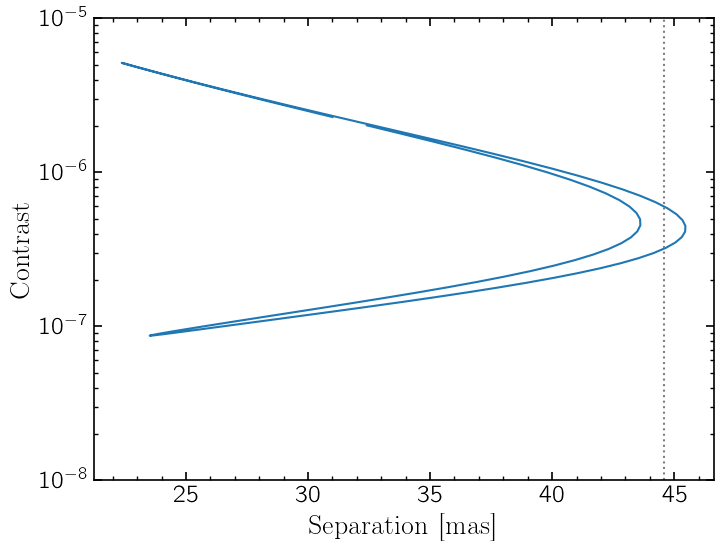

In [17]:
ind = np.where(orbits['pl_name'] == 'GJ 876 b')[0]
s = GetObjectToArrayOfFloats(orbits.loc[ind]['seps_mas'].item())
c = GetObjectToArrayOfFloats(orbits.loc[ind]['conts'].item())

%matplotlib inline
plt.plot(s,c)
plt.axvline(x = orbits['avg sep in mas'][ind].item(),color='grey',ls=':')
plt.gca().set_yscale('log')
plt.ylabel('Contrast')
plt.xlabel('Separation [mas]')
plt.ylim(1e-8,1e-5)

In [19]:
[print(c,orbits.loc[ind][c].item()) for c in orbits.columns]

pl_name GJ 876 b
pl_orbsmax 0.208317
pl_orbper 61.1166
pl_orbincl 59.0
pl_orbeccen 0.0324
pl_bmasse 723.2235
pl_bmassj 2.2756
st_mass 0.32
sy_dist 4.67517
PlanetRadiuse 13.3
pl_orblper 50.3
StarTeff 3293.74
st_logg 4.87
st_met 0.213
StarRad 0.3
sy_imag nan
sy_gaiamag 8.8753
rastr 22h53m17.75s
ra 343.3239737
decstr -14d15m59.74s
dec -14.2665958
SpT Number 6.4
contrast_at_highest_contrast 5.134997153448647e-06
separation_at_highest_contrast_lod_magaox 0.9128833237156936
separation_at_highest_contrast_lod_gmagaox 3.567267141904402
phase_at_highest_contrast 31.016367938549458
separation_at_largest_separation nan
separation_at_largest_separation_lod_magaox 1.3225766738588225
separation_at_largest_separation_lod_gmagaox 5.168222694771397
contrast_at_largest_separation 2.0173943860848567e-06
phase_at_largest_separation 48.73793337008163
separation_at_average_separation_lod_gmagaox 7.109321650721216
separation_at_average_separation_lod_magaox 1.8193145956570045
separation_at_average_separation

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [10]:
def ComputeFluxRatio(Rp, sep, alpha, Ag = 0.5):
    ''' For a single planet compute planet/star flux ratio using Cahoy 2010 eqn 1
    and https://ui.adsabs.harvard.edu/abs/2017ApJ...844...89C/abstract
    
    Args:
        Rp (astropy units object): planet radius
        sep (astropy units object): planet-star separation
        alpha (flt): phase angle in degrees
        Ag (flt): geometric albedo

    Returns:
        flt: planet-star contrast
    '''
    alpha = np.radians(alpha)
    LambertianPhaseFunction = (np.sin(alpha) + (np.pi - alpha)*np.cos(alpha)) / np.pi
    Rp = Rp.to(u.km)
    sep = sep.to(u.km)
    C = Ag * ((Rp / sep)**2) * LambertianPhaseFunction
    return C

def LambertianPhaseFunction(alpha):
    alpha = np.radians(alpha)
    Lambertian = (np.sin(alpha) + (np.pi - alpha)*np.cos(alpha)) / np.pi
    return Lambertian

def GetPhaseAngle(MeanAnom, ecc, inc, argp):
    ''' Function for returning observed phase angle given orbital elements
    Args:
        MeanAnom (flt): Mean anomly in radians, where MeanAnom = orbit fraction*2pi, or M=2pi * time/Period
        ecc (flt): eccentricity, defined on [0,1)
        inc (flt): inclination in degrees, where inc = 90 is edge on, inc = 0 or 180 is face on orbit
        argp (flt): argument of periastron in degrees, defined on [0,360)
        
    Returns:
        flt: phase angle in degrees
    Written by Logan Pearce, 2023
    '''
    import numpy as np
    inc = np.radians(inc)
    argp = np.radians(argp)
    EccAnom = danby_solve(eccentricity_anomaly, MeanAnom, ecc, 0.001, maxnum=50)
    TrueAnom = 2*np.arctan( np.sqrt( (1+ecc)/(1-ecc) ) * np.tan(EccAnom/2) )
    Alpha = np.arccos( np.sin(inc) * np.sin(TrueAnom + argp) )
    
    return np.degrees(Alpha)

def GetOrbitalSepContAlpha(sma, ecc, inc, argp, lon, star_mass, pl_masse, pl_rade, distance, lod, n=100,
                          Ag = 0.4):
    """ Function for computing sepatation, contrast, and phase along a keplerian orbit 
    for a given planet
    
    Args:
        sma (flt): semi-major axis in au
        ecc (flt): eccentricity
        inc (flt): inclination in degrees
        argp (flt): argument of periastron in degrees
        lon (flt): longitude of ascending node in degrees
        star_mass (flt): star mass in Msun
        pl_masse (flt): planet mass in Mearth
        pl_rade (flt): planet radius in Rearth
        distance (flt) distance in pc
        lod (flt): lambda over D
        n (int): number of points at which to calculate orbit
        Ag (flt): geometric albedo
        
    Returns:
        arr: Contrast at each orbit point
        arr: phase at each orbit point
        arr: separation at each orbit point in au
        arr: separation at each orbit point in mas
        arr: separation at each orbit point in lambda/D
        
    """
    # Generate array of mean anomalies covering entire orbit from 0 to 2pi:
    meananom = np.linspace(0,2*np.pi,n)
    # Import keplerian orbit functions:
    from myastrotools.reflectx_supplemental import (keplerian_to_cartesian, keplersconstant, danby_solve, 
                                                    eccentricity_anomaly, GetPhaseAngle, ComputeFluxRatio,
                                                   Get_LOD)
    # compute kepler's constant:
    kep = keplersconstant(star_mass,pl_masse)
    # create empty lists to store results:
    seps = []
    conts = []
    alphas = []
    # at each orbit point:
    for j in range(len(meananom)):
        pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,
                                                   argp,lon,meananom[j],kep)
        sep = np.sqrt(pos[0]**2+pos[1]**2)
        alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)

        # compute flux ratio at each point along orbit:
        Rp = pl_rade
        cont = ComputeFluxRatio(Rp, sep, alpha, Ag = Ag)
        
        # add to the containers:
        seps.append(sep.value)
        conts.append(cont.value)
        alphas.append(alpha)
    # convert to arrays for math:
    seps = np.array(seps)
    conts = np.array(conts)
    alphas = np.array(alphas)
    
    # Convert sep in au to mas:
    seps_mas = (seps/distance)*u.arcsec.to(u.mas)
    # convert sep in mas to lambda/D:
    if len(lod) > 1:
        # if there are more than one lod to compute:
        seps_lod = []
        for i in range(len(lod)):
            seps_lod.append(seps_mas/lod[i])
    else:
        seps_lod = seps_mas/lod
    
    return conts, alphas, seps, seps_mas, seps_lod


# for every planet in the dataframe:
i = np.where(orbits['pl_name'] == 'GJ 876 b')[0]
    
### Inputs:
## Grab orbital parameters:
ecc = orbits.loc[i]['pl_orbeccen'].item()
sma = orbits.loc[i]['pl_orbsmax'].item()*u.au
argp = orbits.loc[i]['pl_orblper'].item() # deg, keplerian_to_cartesian takes angles in degrees
lon = 0 # lon doesn't make a difference in these calculations but 
#         it's needed for separation computation function.
star_mass = orbits.loc[i]['st_mass'].item()*u.Msun
pl_masse = orbits.loc[i]['pl_bmasse'].item()*u.Mearth
pl_rade = orbits.loc[i]['PlanetRadiuse'].item()*u.Rearth
distance = orbits.loc[i]['sy_dist'].item()
inc = orbits.loc[i]['pl_orbincl'].item() # deg

# Get Filters:
from myastrotools.reflectx_supplemental import (SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, 
                                                NIRC2HFilter, NIRC2JFilter)
filters = [SloangFilter(),SloanrFilter(),SloaniFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]
# Compute Lambda/D for i prime filter:
from myastrotools.reflectx_supplemental import Get_LOD
f = filters[2]
# compute for Magellan Clay and GTM telescopes:
lod_magaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 6.5*u.m)
lod_gmagaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 25.4*u.m)
lods = [lod_gmagaox,lod_magaox]

print(sma, ecc, inc, argp, lon, star_mass, pl_masse, pl_rade, distance, lods)
# Compute sep, contrast, phase:
conts, alphas, seps, seps_mas, seps_lod = GetOrbitalSepContAlpha(sma, ecc, inc, argp, lon, 
                                                              star_mass, pl_masse, pl_rade, distance, 
                                                                 lods,
                                                              n=100, Ag = 0.3)


0.208317 AU 0.0324 59.0 50.3 0 0.32 solMass 723.2235 earthMass 13.3 earthRad 4.67517 [6.270858976377953, 24.504587384615384]


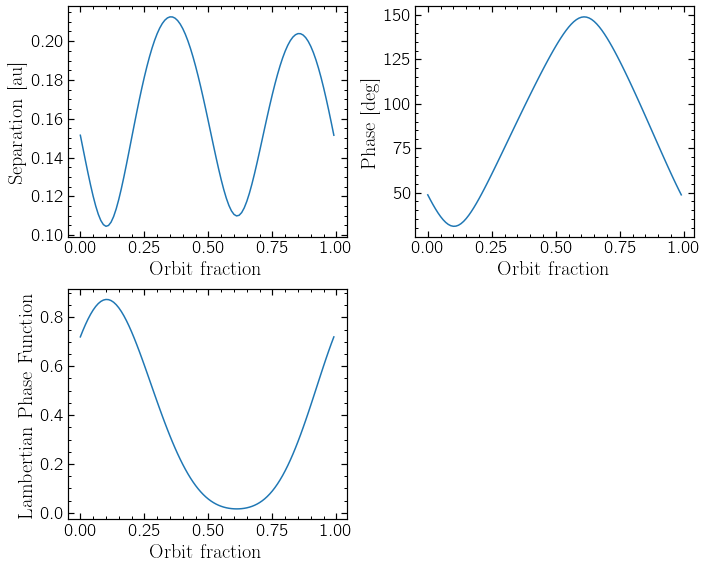

In [16]:
lambertian = np.array([LambertianPhaseFunction(a) for a in alphas])

%matplotlib inline
plt.figure(figsize = (10,8))
plt.subplot(221)
plt.plot( np.array(range(len(seps)))/100,seps)
plt.ylabel('Separation [au]')
plt.xlabel('Orbit fraction')

plt.subplot(222)
plt.plot(np.array(range(len(seps)))/100,alphas)
plt.ylabel('Phase [deg]')
plt.xlabel('Orbit fraction')

plt.subplot(223)
plt.plot(np.array(range(len(seps)))/100,lambertian)
plt.ylabel('Lambertian Phase Function')
plt.xlabel('Orbit fraction')

plt.tight_layout()

(1e-08, 1e-05)

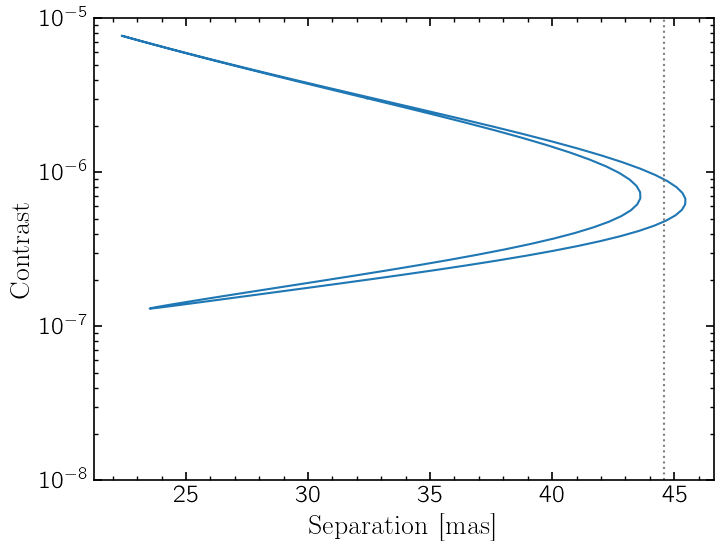

In [17]:
%matplotlib inline
plt.plot(seps_mas,conts, label='Ag=0.3, 2/3 factor')
#plt.plot(seps_mas2,conts2, label='Ag=0.4, No 2/3 factor')
plt.axvline(x = orbits['avg sep in mas'][i].item(),color='grey',ls=':')
#ind = 35
#plt.scatter(seps_mas[ind],conts[ind])
#print(conts[ind])
#ind = 49
#plt.scatter(seps_mas2[ind],conts2[ind])
# print(conts2[ind])
# print(conts2[49]/conts[35])
#plt.axhline(y = contrast2)
plt.gca().set_yscale('log')
plt.ylabel('Contrast')
plt.xlabel('Separation [mas]')

plt.ylim(1e-8,1e-5)

In [3]:


def GetPhaseAngle(MeanAnom, ecc, inc, argp):
    ''' Function for returning observed phase angle given orbital elements
    Args:
        MeanAnom (flt): Mean anomly in radians, where MeanAnom = orbit fraction*2pi, or M=2pi * time/Period
        ecc (flt): eccentricity, defined on [0,1)
        inc (flt): inclination in degrees, where inc = 90 is edge on, inc = 0 or 180 is face on orbit
        argp (flt): argument of periastron in degrees, defined on [0,360)
        
    Returns:
        flt: phase angle in degrees
    Written by Logan Pearce, 2023
    '''
    import numpy as np
    inc = np.radians(inc)
    argp = np.radians(argp)
    EccAnom = danby_solve(eccentricity_anomaly, MeanAnom, ecc, 0.001, maxnum=50)
    TrueAnom = 2*np.arctan( np.sqrt( (1+ecc)/(1-ecc) ) * np.tan(EccAnom/2) )
    Alpha = np.arccos( np.sin(inc) * np.sin(TrueAnom + argp) )
    return np.degrees(Alpha)

In [13]:

orbits= pd.read_csv('GMagAO-X-RV-targets-with-orbital-params.csv')

i = np.where(orbits['pl_name'] == 'GJ 876 b')[0]

## Grab orbital parameters:
ecc = orbits.loc[i]['pl_orbeccen'].item()
sma = orbits.loc[i]['pl_orbsmax'].item()*u.au
argp = orbits.loc[i]['pl_orblper'].item() # deg, keplerian_to_cartesian takes angles in degrees
lon = 0 # lon doesn't make a difference in these calculations but 
#         it's needed for separation computation function.
star_mass = orbits.loc[i]['st_mass'].item()*u.Msun
pl_masse = orbits.loc[i]['pl_bmasse'].item()*u.Mearth
pl_rade = orbits.loc[i]['PlanetRadiuse'].item()*u.Rearth
distance = orbits.loc[i]['sy_dist'].item()
inc = orbits.loc[i]['pl_orbincl'].item() # deg

print('sma',sma, 'ecc',ecc, 'inc',inc, 'argp',argp, 'lon',lon, 'starmass',star_mass, 
      'plmasse',pl_masse, 'plrad',pl_rade, 'distance',distance)

sma 0.208317 AU ecc 0.0324 inc 59.0 argp 50.3 lon 0 starmass 0.32 solMass plmasse 723.2235 earthMass plrad 13.3 earthRad distance 4.67517


In [5]:
# Generate array of mean anomalies covering entire orbit from 0 to 2pi:
#meananom = np.linspace(0,2*np.pi,n)

meananom = np.pi
# Import keplerian orbit functions:
from myastrotools.reflectx_supplemental import (keplerian_to_cartesian, keplersconstant, danby_solve, 
                                                eccentricity_anomaly, GetPhaseAngle, ComputeFluxRatio,
                                               Get_LOD)
# compute kepler's constant:
kep = keplersconstant(star_mass,pl_masse)
print(kep)
# create empty lists to store results:
pos, vel, acc = keplerian_to_cartesian(sma,ecc,inc,
                                           argp,lon,meananom,kep)
sep = np.sqrt(pos[0]**2+pos[1]**2)
alpha = GetPhaseAngle(meananom, ecc, inc, argp)

# compute flux ratio at each point along orbit:
Rp = pl_rade
cont = ComputeFluxRatio(Rp, sep, alpha, Ag = 0.4)
print(sep, cont)
cont = ComputeFluxRatio(Rp, sep, alpha, Ag = 0.3)
print(cont)
        

4.2756257976389394e+19 m3 / s2
0.1616656500938893 AU 1.9914693634324285e-07
1.4936020225743213e-07
